**OUMZIL ZIAD EDDINE**

*25/10/2033*

*Modèles stochastiques en finance MAP 552*

# <center> Computer Problem Set 2.1

# <center> The Black-Scholes hedging strategy

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

In [50]:
def simulation_Brownian(T, n, N) :
    W= np.zeros((n+1, N))
    delta = T/n
    W[1:, ] = np.random.normal(0, 1, size=(n, N))*delta**0.5
    W = W.cumsum(axis=0)
    return W

    
def simulation_Process(S0, T, n, mu, sigma, N) :
    W = simulation_Brownian(T, n, N)
    delta = T/n
    t = np.arange(n+1) * delta
    S = S0 * np.exp((mu - sigma**2/2) * t[:, np.newaxis] + sigma * W)
    return S

## 1) Simulating $S_t$

When mu =  0.05
-> the corresponding sample mean is :  106.91500476777259
-> the corresponding sample variance is :  1652.7948792849775
When mu =  0.02
-> the corresponding sample mean is :  102.36716065721596
-> the corresponding sample variance is :  1447.5241286180383
When mu =  0.45
-> the corresponding sample mean is :  198.0141120218205
-> the corresponding sample variance is :  5866.608583497554


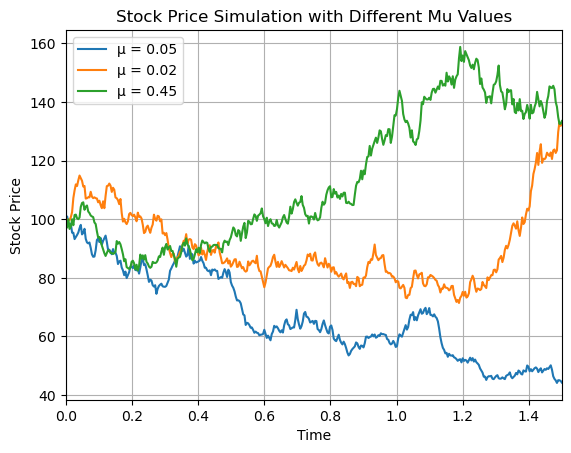

In [110]:
## Question 1)
N = 1000
T = 1.5
S0 = 100
sigma = 0.3
r = 0.05
n = 400

t = np.arange(n+1)* T/n


mu_list = [0.05, 0.02, 0.45]
for mu in mu_list :
    S = simulation_Process(S0, T, n, mu, sigma, N)
    mean = S[-1, :].mean()
    var = S[-1, :].var()
    print("When mu = ", mu)
    print("-> the corresponding sample mean is : ", mean)
    print("-> the corresponding sample variance is : ", var)
    plt.plot(t, S[:, 0], label="μ = {}".format(mu), linestyle='-')

plt.legend()
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Simulation with Different Mu Values')
plt.xlim(0, T)

plt.show()


We remark that when the drift $\mu$ is big, the mean is also large. Same goes for the variance.

# 2) Hedging Strategy 

In [82]:
# Implementing functions that will be used in the next questions

def d_plus(s, k, v) :
    return np.log(s/k)/np.sqrt(v) + 1/2 * np.sqrt(v)

def d_minus(s, k, v) :
    return np.log(s/k)/np.sqrt(v) - 1/2 * np.sqrt(v)

def Delta(S, K, t, T, r) :
    k =  K * np.exp(-r*(T - t)) 
    v = sigma**2 * (T-t)
    return norm.cdf(d_plus(S, k, v))

def BS(S0, K, T, r) :
    return S0 * norm.cdf(d_plus(S0, K*np.exp(-r*T), sigma**2 * T)) - K * np.exp(-r * T)* norm.cdf(d_minus(S0, K*np.exp(-r*T), sigma**2*T))

In [124]:
# Question 2-a) and 2-b)

# This function returns X and (S_T-K)^+, which will help us to compute the PL_n

def simulation_X(S0, T, n, mu, sigma, r,  K, N) :
    S = simulation_Process(S0, T, n, mu, sigma, N)
    t = np.linspace(0, T, n+1, endpoint=True)[:, np.newaxis]
    
    BS_array = BS(S0, K, T, r)
    Deltas = Delta(S[:-1, ], K, t[:-1, :], T, r)
    
    X = BS_array + np.sum(Deltas*(np.exp(-r*t[1:, :]) * S[1: , ] - np.exp(-r*t[:-1, :])* S[:-1, :]), axis=0)
    X = X * np.exp(r*T)
    return X, np.maximum(S[-1, ] - K, 0)

In [127]:

def PL_n(n, mu,  K_list) :
    # The below X is a 2D table, such that [K] are the N = 1000 samples for the corresponding K and mu
    X = np.zeros((len(K_list), N))
    # The below PL is a 2D table corresponding to the Profit and Loss
    PL = np.zeros((len(K_list), N))
    for i, K in enumerate(K_list) :
        X[i, :], P = simulation_X(S0, T, n, mu, sigma, r, K, N)
        PL[i,  :] = X[i, :] - P
    return PL, X


## The mean and variance of PL_n

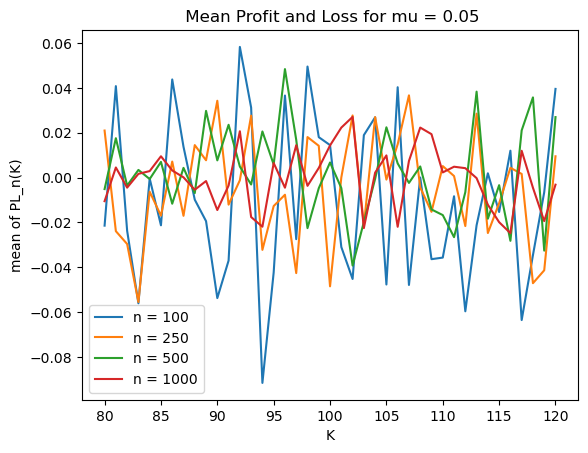

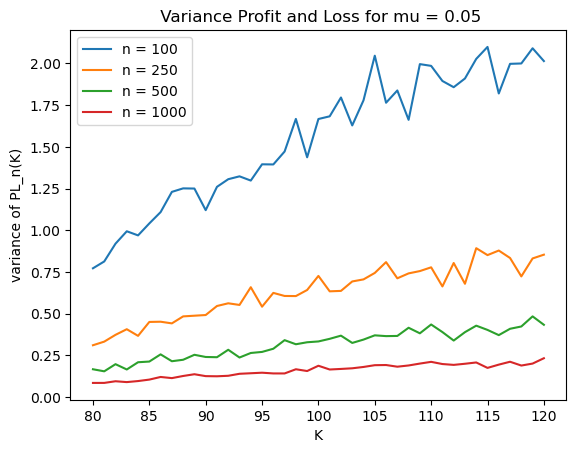

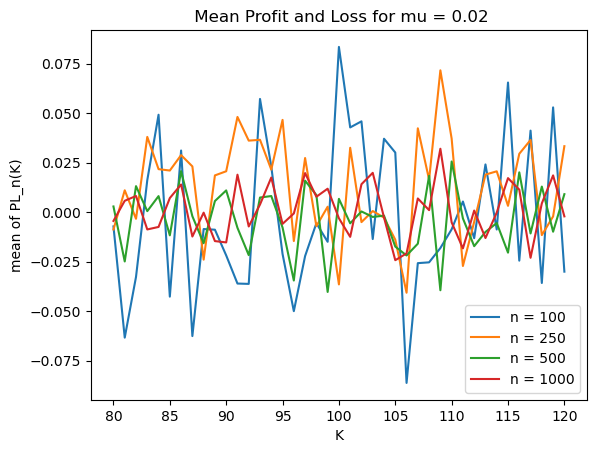

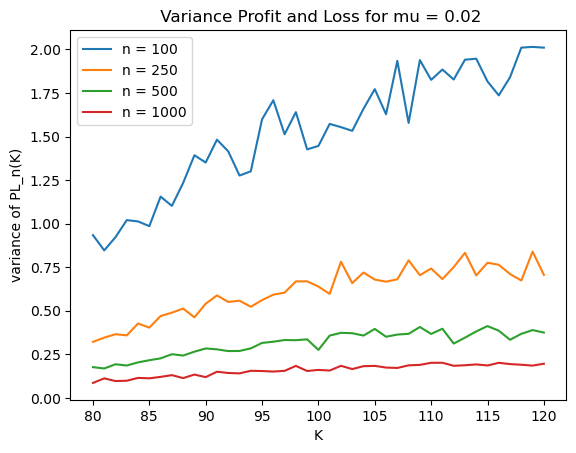

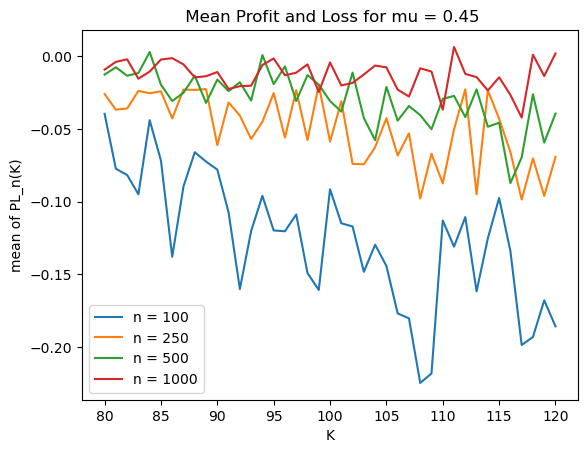

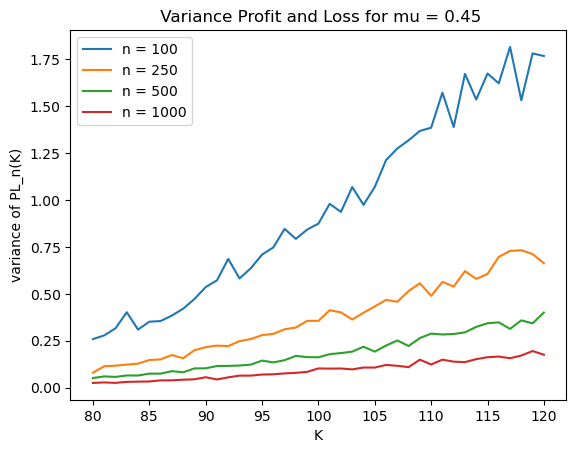

In [136]:
# Question 2-c)


K_list = range(80, 121)
n_list = [100, 250, 500, 1000]

for mu in mu_list :
    variance_PL_n = np.zeros((len(n_list), len(K_list)))
    for i, n in enumerate(n_list) :
        PL, _ = PL_n(n, mu, K_list)
        mean_PL_mu_K = PL.mean(axis=1)
        variance_PL_n[i, :] = PL.var(axis=1)
        plt.plot(K_list, mean_PL_mu_K, label = 'n = {}'.format(n))
    
    # Ploting the mean 
    plt.xlabel('K')
    plt.ylabel('mean of PL_n(K)')
    plt.title(' Mean Profit and Loss for mu = {}'.format(mu))
    plt.legend()
    plt.show()
    
    #Ploting the variance
    for i, n in enumerate(n_list) :
        plt.plot(K_list, variance_PL_n[i, :], label = 'n = {}'.format(n))
    plt.xlabel('K')
    plt.ylabel('variance of PL_n(K)')
    plt.title(' Variance Profit and Loss for mu = {}'.format(mu))
    plt.legend()
    plt.show()
    

Without any surprise the mean of **PL** is almost zero, because of our hedging startegy.

for small $n$, for example $(n=100)$ the corresponding variance is large.

